In [96]:
import pandas as pd
import gzip
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [41]:
haps = open('hap_library.txt','r')
pos = haps.readline().strip().split()
poser = [int(i.split(':')[1]) for i in pos]
pos_series = pd.Series(poser)

In [155]:
poser[243041]

651561

In [153]:
start = pos_series[(pos_series>15300000) & (pos_series<15700000)].index.tolist()[0]
stop  = pos_series[(pos_series>15300000) & (pos_series<15700000)].index.tolist()[-1]
print start
stop

243041


248321

In [42]:
genotypes = []
for line in haps:
    genotypes.append(line[start:stop])

In [45]:
len(genotypes)
genotypes[0][40:80]

'0202220202000002030020000022222022020200'

In [53]:
trans = {'0':('0','0'),'2' :('1','1'),'3':('0','1'),'4':('1','0'),'5':('0','0')}
for i in genotypes[0][40:80]:
    a,b = trans[i]
print a
print b

0
0


In [58]:
haplist = []
for anim in genotypes:
    ma = []
    pa = []
    for pos in anim:
        a,b = trans[pos]
        ma.append(a)
        pa.append(b)
    haplist.append(''.join(ma))
    haplist.append(''.join(pa))

In [59]:
len(haplist)

2294

In [60]:
len(set(haplist))

2292

In [61]:
len(haplist[0])

5280

In [121]:
sub = [i[500:600] for i in haplist]
len(set(sub))

497

In [138]:
Counter(sub).most_common(10)

[('0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
  581),
 ('0100100000001000001000101110000000001010101101010001111111101101111011111111110111111111111101111110',
  175),
 ('0000100001001001000000101110010000001010111101010011111111101111111011111111110111101111111101111110',
  131),
 ('0000000000001000100000101110000100001010101101010001111111101101111011111111110111101111111101111111',
  101),
 ('0100000000001000001000101110000000001010101101010001111111101101111011111111110111111111111101111110',
  66),
 ('0000000000011000000000101110000000001010101101010001111111101101111011111111110111101111111101111111',
  58),
 ('0000000001001001000000101110010000001010111101010011111111111111111011111111110111101111111101111110',
  52),
 ('0000100001001001000000101110010000001010111101010011111111111111111011111111110111101111111101111110',
  43),
 ('00000000010010010000001011100100000010101111010100111111111011111110111111111101111011111

In [136]:
counts = [i[1]/float(2274) for i in Counter(sub).most_common(497)]
pltter=pd.Series(counts)

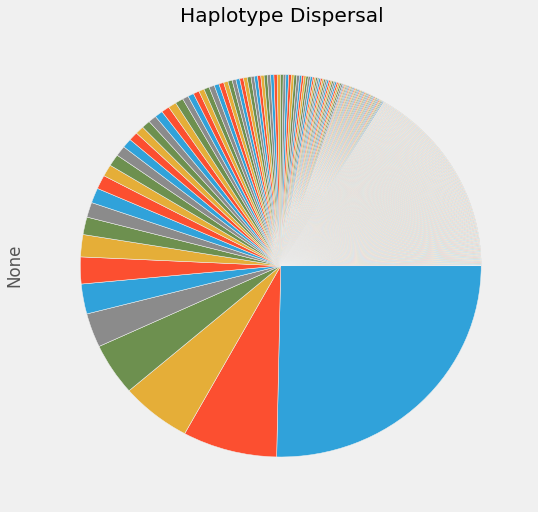

In [137]:
matplotlib.style.use('fivethirtyeight')
pltter.plot(kind='pie',labels=None,title='Haplotype Dispersal',counterclock=False,figsize=(8,8))


In [94]:
#sorted(Counter(sub).values()).head()